# In Class Assignment 

## Monday, March 19, 2018

Today's class focuses on Causality. In this in class example, we are going to set up a randomized control trial using artificially generated data.

We begin by creating a class called Subject. If you have not had experience with object oriented programming, this is just a nice concise way of creating an object that can store information, and which we can interact with in a simple way.

A 'Subject' instance has attributes:

* Subject.nfeatures - number of features
* Subject.features - list of features in $\mathbb{R}^{Subject.nfeatures}$
* Subject.coeffs - coefficients for how each feature affects the outcome
* Subject.type - boolean: 1 if the user is in the treatment group, 0 if the user is in the control group
* Subject.outcome - A real number with the subject's outcome of the experiment
* Subject.confound - boolean used in the final task to investigate the effects of the presence of a confounding variable

You can access these attributes by running Subject.attribute, though in practice it is better to only interact with the defined functions:

* Subject.assignGroup(treatment_type) - function that assigns the subjects to either the treatment group (treatment_type=1) or the control group (treatment_type=0).
* Subject.getOutcome() - See the outcome of the treatment for the given subject.


In [35]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.optimize as opt

#Generate dummy data and instantiate functions
np.random.seed(1337)
cc=-1

class Subject:
    
    def __init__(self,features,coeffs,confound=0):
        
        self.nfeatures=len(features)
        self.features=np.zeros(self.nfeatures)
        self.coeffs=coeffs
        assert len(coeffs)==self.nfeatures+1
        
        for i in range(self.nfeatures):
            self.features[i]=np.random.normal(features[i][0],features[i][1])
        
        self.type=None
        self.outcome=None
        self.confound=confound
        self.coeff_confound=cc
        
        self._variance=2.0
       
    
    def assignGroup(self,treatment_type):
        
        self.type=treatment_type
        return 
    
    def getFeature(self,index):
        
        return self.features[index]
    
    def getOutcome(self):
        if self.type==None:
            print( 'Subject has not been assigned to a group')
            return None
        else:
            mean=0
            for i in range(self.nfeatures):
                mean+=coeffs[i]*self.features[i]
            mean+=coeffs[-1]*self.type
            if self.confound:
                mean+=self.coeff_confound*self.type
                
            return np.random.normal(mean,self._variance)


def getSettings(nfeatures=5):
    feat_means=np.random.choice(range(10),nfeatures)
    feat_vars=np.random.uniform(0,8,nfeatures)
    features=[]
    for i in range(nfeatures):
        features.append((feat_means[i],feat_vars[i]))
        
    coeffs=np.random.uniform(-5,5,nfeatures+1)
    return coeffs,features
    
def generateSubjects(Nsubjects,coeffs,features,confound=0):
    
    subjects=[]
    
    for i in range(Nsubjects):
        subjects.append(Subject(features,coeffs,confound))
    
    
    return subjects

nfeatures=5
coeffs,features=getSettings(nfeatures)

## Task 1: Visualize Distributions
We are going to begin by using the histogram feature of matplotlib.pyplot to visualize the distribution of the featuers of our subjects. Remeber, the goal of a randomized control trial is to ensure that the feature distributions of the control and treatment groups are essentially the same.

The function plotDistribution that you are to complete below takes in:

* subjects - a list of subject instances
* f - the index of the feature of interest 
* num_bins - the number of bins we would like in the histogram 
* subplot - an extra argument for the subplot that you do not need to worry about dealing with

It should return the bins from the hist function, the mean value for the given feature across the population and its variance.

Remember that the matplotlib function plt.hist has the following syntax:

matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)

** Do not use the plt.show() command in this function **



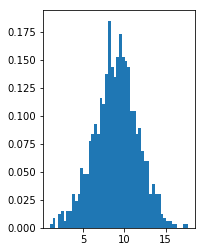

In [36]:
def plotDistribution(subjects,f,num_bins=50,subplot=1):
    plt.subplot(120+subplot)
    
    #TODO
    
    
    return bins,mean,var

#coeffs,features=getSettings(nfeatures)
subjects=generateSubjects(1000,coeffs,features,0)
bins,mu,var=plotDistribution(subjects,3)
plt.show()

## Task 2: Assign the Subjects a Treatment

We will now partition the subjects into two groups, the control, and treatment groups using 0,1 for control and treatment respectively. 

**The way you parition is left to you, the key is to make sure that the two groups are similarly distributed.**

the partitionSubjects function you are to complete takes in the list of subject instances, and returns two lists. One with the subjects that have been assigned to the control group, and the other for the subjects that have been assigned to the treatment group.

Remember to use the functions defined in the Subject class at the beginning of the assignment.

In [37]:
def partitionSubjects(subjects):
    
    #TODO 
        
    return control,treatment

control,treatment=partitionSubjects(subjects)

print ('Number of Subjects in Control Group: '+(str(len(control))))
print ('Number of Subjects in Treatment Group: '+(str(len(treatment))))
    

Number of Subjects in Control Group: 492
Number of Subjects in Treatment Group: 508


## Task 3: Compare the two groups

The compareGroups functions should plot the distributions of both the control and treatment groups for a given feature $f$.

You can use the plotDistribution function above, and set subplot=1 or 2 to plot the two plots next to each other. numbins is a design argument you can play with.

Do the two groups look similar distributionally? How would you measure the difference between the two groups?



Feature 1: 


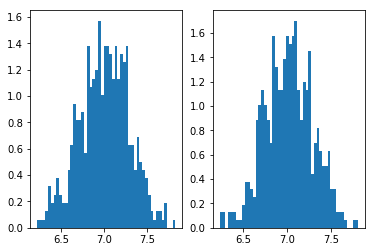

Feature 2: 


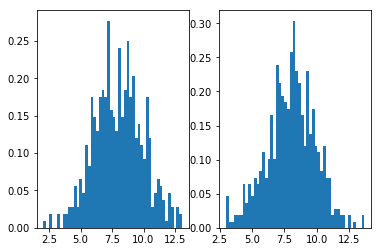

Feature 3: 


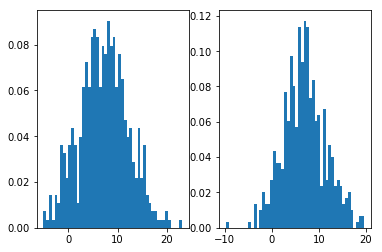

Feature 4: 


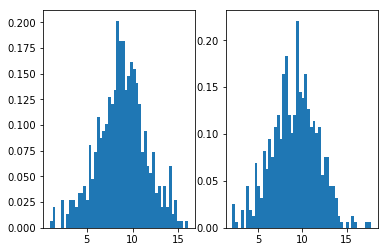

Feature 5: 


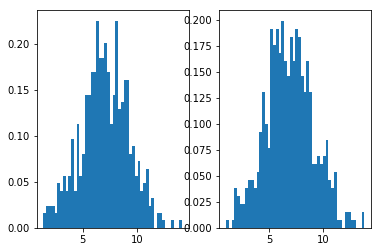

In [38]:
def compareGroups(control,treatment,f,numbins=10):
    
    
    plt.show()
    return

for i in range(nfeatures):
    print('Feature '+str(i+1)+': ')
    compareGroups(control,treatment,i)       


## Task 4: Calculate Treatment Effects:

Use the outcome function for each Subject instance to calculate the treatment effect.

In [39]:
def calculate_Treatment_Effect(control,treatment):
    
     #TODO   
    return treatment_effect


    

In [40]:
print ('The Estimated treatment effect is: ' + str(calculate_Treatment_Effect(control,treatment)))
print ('The True treatment effect is: ' + str(coeffs[-1]))


The Estimated treatment effect is: -3.209682707126534
The True treatment effect is: -3.40051364577


Now investigate the effects of the number of subjects on your estimate of the treatment effect:

In [41]:
N=100000
subjects=generateSubjects(N,coeffs,features)
control,treatment=partitionSubjects(subjects)
print ('The Estimated treatment effect is: ' + str(calculate_Treatment_Effect(control,treatment)))
print ('The True treatment effect is: ' + str(coeffs[-1]))

The Estimated treatment effect is: -3.6364626219250162
The True treatment effect is: -3.40051364577


## Task 5: Effects of a Confounding Variable
Now, lets investigate the effects of a confounding variable. Remember the definition of a confounding variable form class. The next cell uses your functions and estimates the treatment effects. Run it multiple times to see how the confounding variable can either make you overestimate or underestimate the treatment effect.

In [47]:
#coeffs,features=getSettings(nfeatures)
cc=np.random.normal(0,5)
subjects=generateSubjects(10000,coeffs,features,1)
control,treatment=partitionSubjects(subjects)
print ('The Estimated treatment effect is: ' + str(calculate_Treatment_Effect(control,treatment)))
print ('The True treatment effect is: ' + str(coeffs[-1]))

The Estimated treatment effect is: -1.8040273964023097
The True treatment effect is: -3.40051364577


How would you deal with the confounding variable?